# Convolutional Neural Network (Computer Vision)

In [2]:
# import data from h5 files
import h5py
import numpy as np

def load_dataset():
    train_dataset = h5py.File('train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) #  train features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) #  train labels

    test_dataset = h5py.File('test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) #  test features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) #  test labels

    classes = np.array(test_dataset["list_classes"][:]) # list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((train_set_y_orig.shape[0]),1)
    test_set_y_orig = test_set_y_orig.reshape((test_set_y_orig.shape[0],1))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig

In [3]:
#load dataset 
X_train, Y_train, X_test, Y_test = load_dataset()

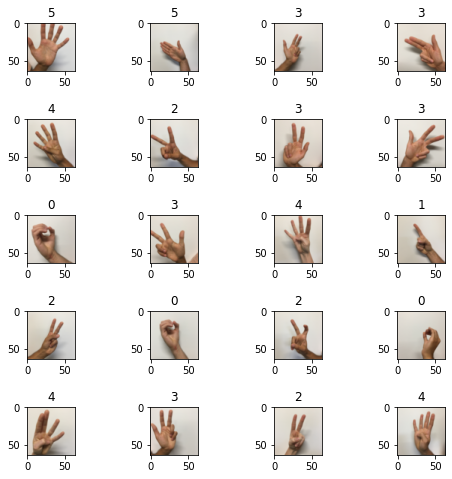

In [4]:
# Plot 
import matplotlib.pyplot as plt
# 20 random indicies
import random
samples = []
for i in range(20):
    samples.append(random.randint(0,len(X_train)))
samples
#plot in 4x5
plt.figure(figsize=(12,12))
for idx, item in enumerate(samples):
    plt.subplot(5, 4, idx+1)
    plt.imshow(X_train[item])
    plt.title(Y_train[item][0])
    plt.subplots_adjust(.5,.5,1,1,1,1)

In [5]:
# divide by the maximum possible value to scale down units 0-1
X_train_new = X_train/255
X_test_new = X_test/255

In [6]:
#Model imports
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
import tensorflow as tf

In [7]:
# Create Model
model = Sequential()

# convolution layer to create a feature map. Rectified Linear Unit is used to introduce non-linearity into the model.
model.add(Conv2D(32,kernel_size = (5,5),strides=(1,1), activation='relu', input_shape = X_train.shape[1:]))

# extract features from feature map
model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))

# convolution layer to create another feature map
model.add(Conv2D(64, (5,5), activation = 'relu'))

# extract features from feature map
model.add(MaxPooling2D(pool_size = (2,2)))
# 1D array for neural network
model.add(Flatten())

# Fully connected layer
model.add(Dense(1000, activation = 'relu'))

# softmax chooses between 6 possible target values
model.add(Dense(6, activation = 'softmax'))

In [8]:
model.compile(loss = 'SparseCategoricalCrossentropy', optimizer = 'adam', metrics = 'accuracy')

In [10]:
history = model.fit(X_train_new,Y_train, batch_size = 500, epochs = 100, validation_data = (X_test_new,Y_test))

Epoch 1/100
3/3 [==============================] - 3s 737ms/step - loss: 0.6088 - accuracy: 0.7991 - val_loss: 0.6932 - val_accuracy: 0.7917
Epoch 2/100
3/3 [==============================] - 3s 729ms/step - loss: 0.5339 - accuracy: 0.8296 - val_loss: 0.6526 - val_accuracy: 0.7667
Epoch 3/100
3/3 [==============================] - 3s 755ms/step - loss: 0.4680 - accuracy: 0.8519 - val_loss: 0.6511 - val_accuracy: 0.7500
Epoch 4/100
3/3 [==============================] - 3s 699ms/step - loss: 0.4571 - accuracy: 0.8444 - val_loss: 0.5371 - val_accuracy: 0.8083
Epoch 5/100
3/3 [==============================] - 3s 738ms/step - loss: 0.4048 - accuracy: 0.8704 - val_loss: 0.5232 - val_accuracy: 0.8250
Epoch 6/100
3/3 [==============================] - 3s 787ms/step - loss: 0.3491 - accuracy: 0.8870 - val_loss: 0.6648 - val_accuracy: 0.7250
Epoch 7/100
3/3 [==============================] - 3s 827ms/step - loss: 0.3911 - accuracy: 0.8694 - val_loss: 0.5093 - val_accuracy: 0.8333
Epoch 8/100
3

Text(0.5, 1.0, 'Loss Curves')

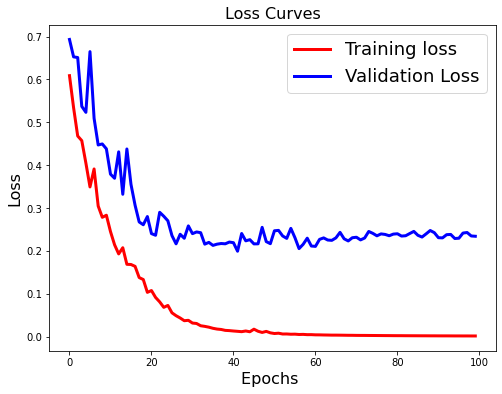

In [11]:
# visualize the model loss
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

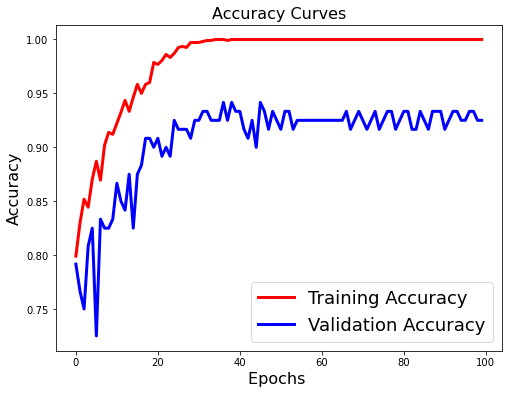

In [12]:
# visualize the model accuracy
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)